In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib import rc
from IPython.display import HTML, Image
rc('animation', html='html5')

# Roatating single vector

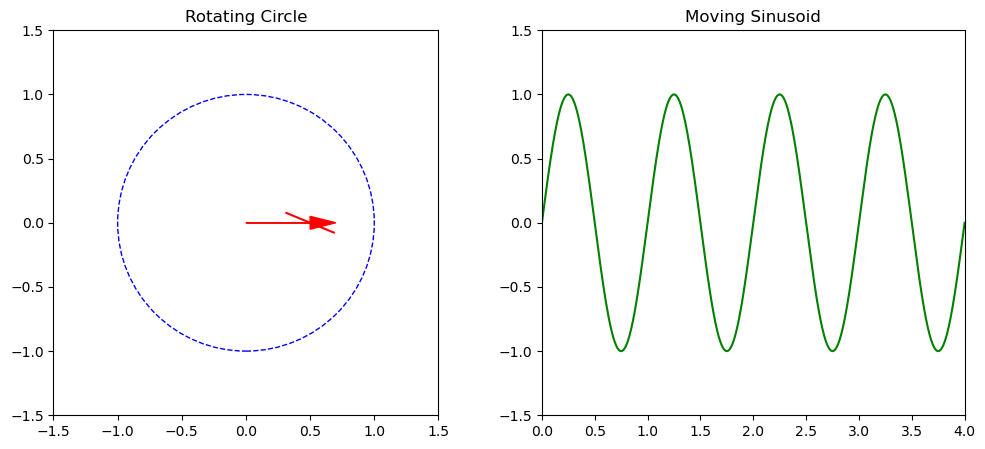

In [18]:
# Function to create a rotating arrow
def arrow(ax, angle):
    arrow_length = 0.5
    arrow_head_length = 0.2
    arrow_head_width = 0.1
    arrow_x = arrow_length * np.cos(angle)
    arrow_y = arrow_length * np.sin(angle)
    arrow_dx = arrow_head_length * np.cos(angle - np.pi / 8)
    arrow_dy = arrow_head_length * np.sin(angle - np.pi / 8)

    ax.arrow(0, 0, arrow_x, arrow_y, head_width=arrow_head_width, head_length=arrow_head_length, fc='red', ec='red')
    ax.plot([arrow_x, arrow_x + arrow_dx], [arrow_y, arrow_y + arrow_dy], color='red')
    ax.plot([arrow_x, arrow_x - arrow_dx], [arrow_y, arrow_y - arrow_dy], color='red')

# Function to update the plot at each frame
def update(frame):
    ax1.clear()
    ax2.clear()

    # Update the rotating arrow in the first subplot
    angle = np.radians(frame)
    circle = plt.Circle((0, 0), 1, fill=False, color='blue', linestyle='dashed')
    ax1.add_artist(circle)
    arrow(ax1, angle)

    # Update the moving sinusoid in the second subplot
    x_values = np.linspace(0, 4, 1000)
    y_values = np.sin(2 * np.pi * (x_values - frame / 100))
    ax2.plot(x_values, y_values, color='green')

    # Set axis limits
    ax1.set_xlim(-1.5, 1.5)
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_aspect('equal')
    ax1.set_title('Rotating Circle')

    ax2.set_xlim(0, 4)
    ax2.set_ylim(-1.5, 1.5)
    ax2.set_title('Moving Sinusoid')

# Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Create the animation
animation = FuncAnimation(fig, update, frames=360, interval=50, blit=False)

In [19]:
animation

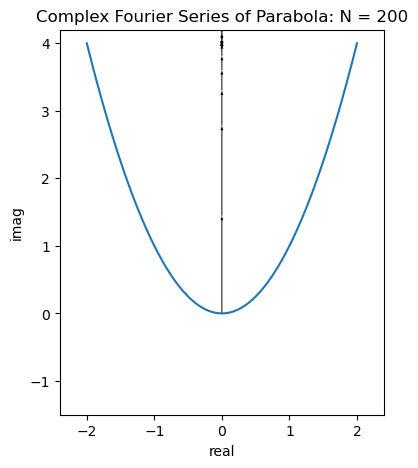

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import FancyArrow

class arrow:
    
    def __init__(self, n, cn, period):
        self.cn = cn
        self.n = n
        self.val = cn
        self.start = complex
        self.end = complex
        self.len = abs(self.val)
        self.period = period
    
    def update(self, t, new_start = 0):
        #self.t = self.t+self.dt
        #self.val = self.cn*np.exp(1j*self.n*2*np.pi*self.t/self.period)
        self.val = self.cn*np.exp(1j*self.n*2*np.pi*t/self.period)
        self.start = new_start
        self.end = self.start+self.val
              

def sort_by(e):
    return e.len

def animate(t, label, xlim, ylim, N):

    xs = []
    ys = []
    us = []
    vs = []

    for n in range(len(arrows)):

        if n ==0:
            arrows[n].update(t = t)
        else:
            arrows[n].update(t=t, new_start = arrows[n-1].end)
        ar = arrows[n]

        xs.append(ar.start.real)
        ys.append(ar.start.imag)
        us.append(ar.val.real)
        vs.append(ar.val.imag)
        if n == len(arrows)-1:
            x_mem.append(ar.end.real)
            y_mem.append(ar.end.imag)
    
    ax.clear()
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_xlim(xlim[0],xlim[1])
    ax.set_xlabel('real')
    ax.set_ylabel('imag')
    ax.set_title('Complex Fourier Series of'+ ' ' + label +': N = {}'.format(str(N)))
    vectors = ax.quiver(xs, ys, us, vs, angles='xy', scale_units='xy', scale=1)
    approximated = ax.plot(x,y, label = label)
    approx = ax.plot(x_mem,y_mem, label = 'Fourier approx.')
    #ax.legend()
    ax.set_aspect(1)

p=4

half_n = 200
arrows = []
t0 = -2
tf =2

cn_eval = lambda t,a,p: (np.exp(a*t)/p)*((t/a)-(1/a**2)+(1j*t**2)/(a)-(1j*2*t)/(a**2)+(1j*2)/(a**3))
cn0_eval = lambda t, p : (1/p)*((t**2)/2 +1j*(t**3)/3) 

for n in range(-half_n,half_n+1):
    
    if n == 0:
        cn = cn0_eval(tf,p)-cn0_eval(t0,p)
        
    else:
        a = (-1j*2*np.pi*n)/p
        cn = cn_eval(tf,a,p)-cn_eval(t0,a,p)
        
    arrows.append(arrow(n,cn, p))

arrows.sort(key = sort_by, reverse = True)


for n in range(len(arrows)):
    if n ==0:   
        arrows[n].start = 0
    else:
        arrows[n].start = arrows[n-1].end
    
    arrows[n].end = arrows[n].start + arrows[n].val

fig, ax = plt.subplots(figsize = (5,5))

x_mem = []
y_mem = []

time = np.linspace(-2,2,200)


z = time+1j*(time**2)

x= z.real
y = z.imag

ani = FuncAnimation(
    fig = fig, func = animate, frames = time,  fargs = ('Parabola',  [-2.4,2.4], [-1.5, 4.2], half_n),blit = False)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

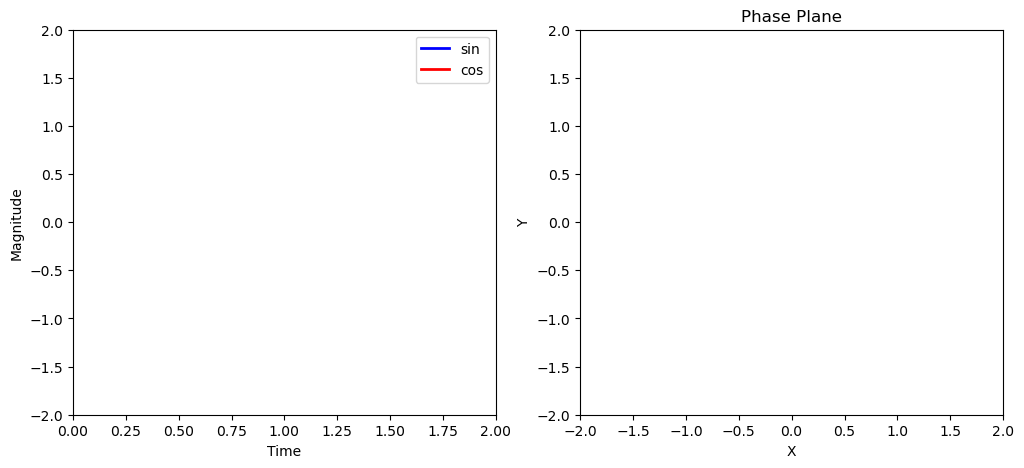

In [2]:
# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(( 0, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Phase Plane')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin','cos']);


In [3]:


# animation function. This is called sequentially
def drawframe(n):
    x = np.linspace(0, 2, 1000)
    y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(y1[0:50],y2[0:50])
    pt1.set_data(y1[0],y2[0])
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,line2)



In [4]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)

/tmp/ipykernel_49593/2138599389.py:9: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt1.set_data(y1[0],y2[0])


In [5]:
from matplotlib import rc

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [6]:
anim

RuntimeError: Requested MovieWriter (ffmpeg) not available

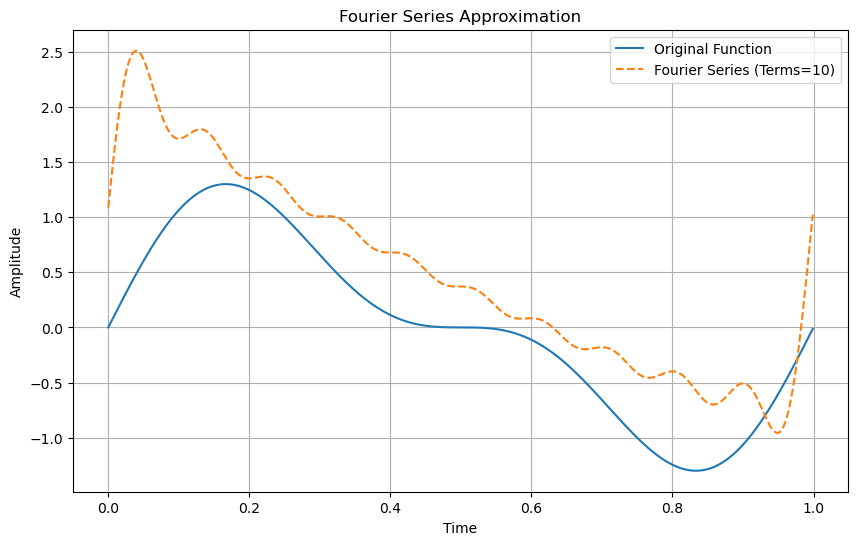

In [3]:
# Define the periodic function
def original_function(t):
    # You can change this function to visualize different periodic functions
    return np.sin(2 * np.pi * t) + 0.5 * np.sin(4 * np.pi * t)

# Function to calculate Fourier series approximation
def fourier_series_approximation(t, num_terms=10):
    result = 0.5  # Initial value (average value)
    
    for n in range(1, num_terms + 1):
        result += np.sin(2 * np.pi * n * t) / n  # Add the sine term
        result += 0.2 * np.cos(2 * np.pi * n * t) / n  # Add the cosine term
    
    return result

# Generate time values
t_values = np.linspace(0, 1, 1000, endpoint=False)

# Generate original function values
original_values = original_function(t_values)

# Generate Fourier series approximation values
num_terms = 10  # Number of terms in the Fourier series
approximation_values = [fourier_series_approximation(t, num_terms) for t in t_values]

# Plot the original function and its Fourier series approximation
plt.figure(figsize=(10, 6))
plt.plot(t_values, original_values, label='Original Function')
plt.plot(t_values, approximation_values, label=f'Fourier Series (Terms={num_terms})', linestyle='--')
plt.title('Fourier Series Approximation')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

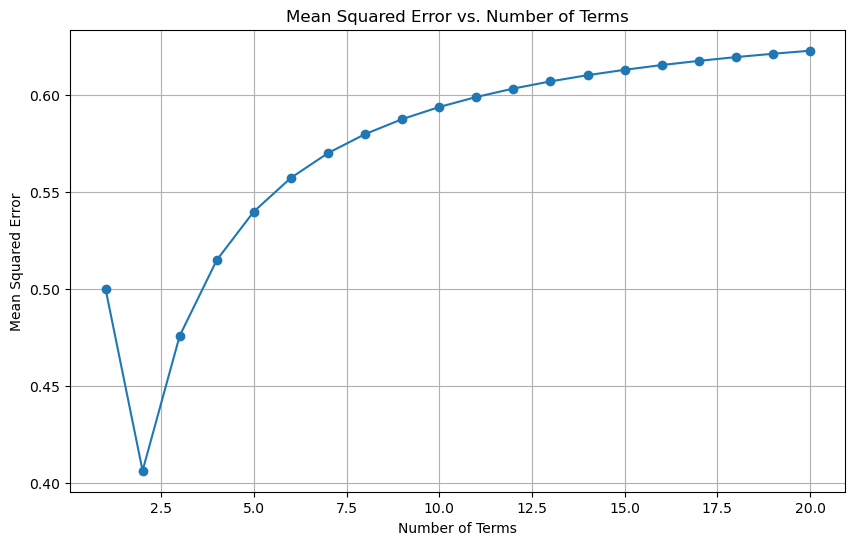

The best number of terms for the Fourier series approximation is: 2


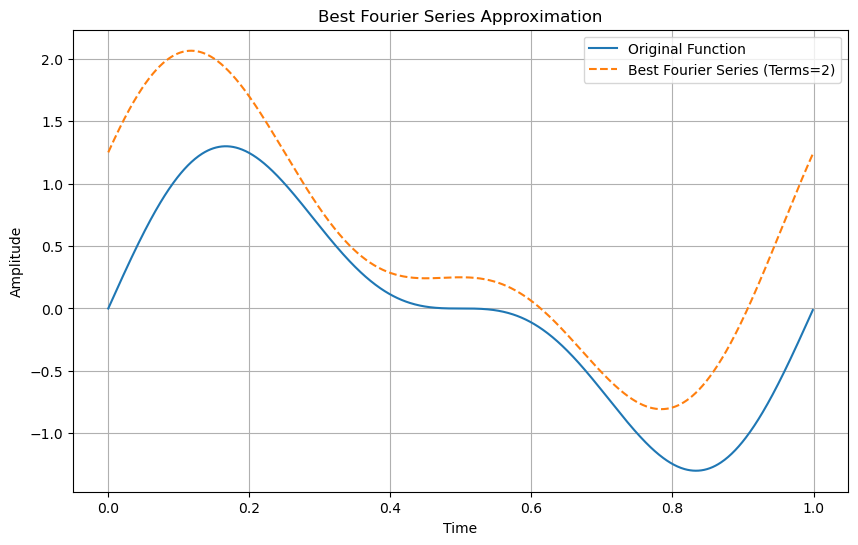

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the periodic function
def original_function(t):
    return np.sin(2 * np.pi * t) + 0.5 * np.sin(4 * np.pi * t)

# Function to calculate Fourier series approximation
def fourier_series_approximation(t, num_terms=10):
    result = 0.5  # Initial value (average value)
    
    for n in range(1, num_terms + 1):
        result += np.sin(2 * np.pi * n * t) / n  # Add the sine term
        result += 0.5 * np.cos(2 * np.pi * n * t) / n  # Add the cosine term
    
    return result

# Function to calculate mean squared error
def calculate_mse(original, approx):
    return np.mean((original - approx)**2)

# Generate time values
t_values = np.linspace(0, 1, 1000, endpoint=False)

# Generate original function values
original_values = original_function(t_values)

# Try different numbers of terms and calculate MSE
num_terms_values = range(1, 21)
mse_values = []

for num_terms in num_terms_values:
    approximation_values = np.array([fourier_series_approximation(t, num_terms) for t in t_values])
    mse = calculate_mse(original_values, approximation_values)
    mse_values.append(mse)

# Find the number of terms that minimizes the MSE
best_num_terms = num_terms_values[np.argmin(mse_values)]

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.plot(num_terms_values, mse_values, marker='o')
plt.title('Mean Squared Error vs. Number of Terms')
plt.xlabel('Number of Terms')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Print the best number of terms
print(f"The best number of terms for the Fourier series approximation is: {best_num_terms}")

# Plot the original function and its best Fourier series approximation
best_approximation_values = [fourier_series_approximation(t, best_num_terms) for t in t_values]

plt.figure(figsize=(10, 6))
plt.plot(t_values, original_values, label='Original Function')
plt.plot(t_values, best_approximation_values, label=f'Best Fourier Series (Terms={best_num_terms})', linestyle='--')
plt.title('Best Fourier Series Approximation')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
best_num_terms

2

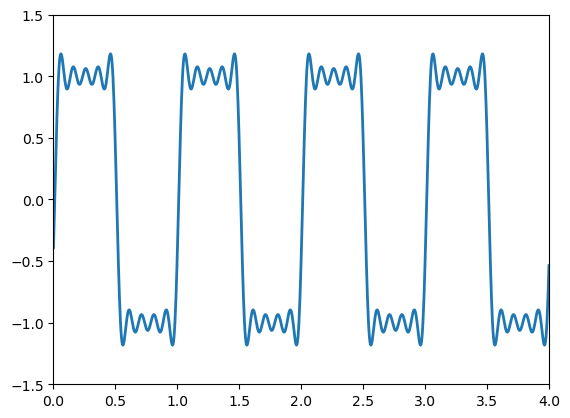

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the square wave function
def square_wave(t, num_terms):
    result = 0.0
    for n in range(1, num_terms + 1, 2):
        result += (1 / n) * np.sin(2 * np.pi * n * t)
    return 4 / np.pi * result

# Create the time values
t_values = np.linspace(0, 4, 1000, endpoint=False)

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 4)
ax.set_ylim(-1.5, 1.5)

# Initialize the line object
line, = ax.plot([], [], lw=2)

# Function to update the plot at each frame
def update(frame):
    # Update the data for the line object
    y_values = square_wave(t_values + frame / 100, 10)
    line.set_data(t_values, y_values)
    return line,

# Create the animation
animation = FuncAnimation(fig, update, frames=100, interval=50, blit=True)

# Display the animation
animation

In [16]:
from IPython.display import HTML
HTML(anim.to_html5_video())

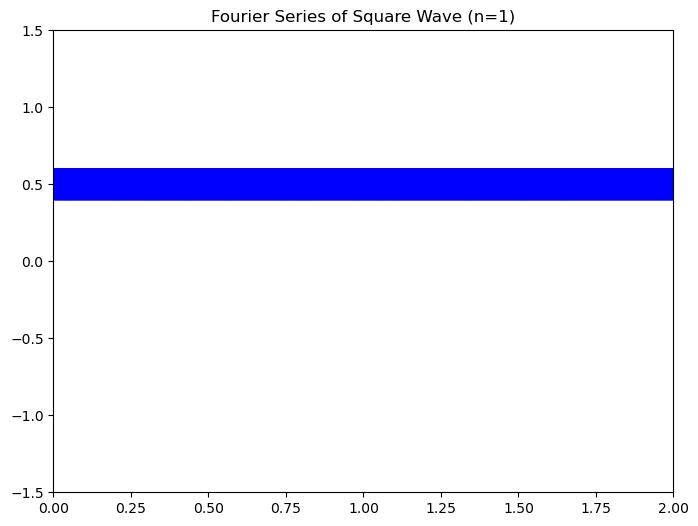

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Define the Fourier series
def fourier_series(x, n):
    a0 = 1 / 2
    an = 2 / np.pi * np.sin(np.pi * n)
    bn = 0
    sum_terms = a0
    for i in range(1, n + 1):
        sum_terms += an * np.cos(2 * np.pi * i * x) + bn * np.sin(2 * np.pi * i * x)
    return sum_terms

# Define the animation function
def update(frame):
    x = np.linspace(0, 2, 200)
    y = fourier_series(x, frame)

    # Create the circle objects
    circles = []
    for i in range(len(x)):
        circle = plt.Circle((x[i], y[i]), 0.1, color='blue')
        circles.append(circle)

    # Clear the axes and redraw the circles
    ax.clear()
    for c in circles:
        ax.add_artist(c)

    # Set the limits of the axes
    ax.set_xlim(0, 2)
    ax.set_ylim(-1.5, 1.5)

    # Set the title of the plot
    ax.set_title(f"Fourier Series of Square Wave (n={frame})")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the animation
animation = FuncAnimation(fig, update, frames=np.arange(1, 21), interval=100)

# Show the animation
animation

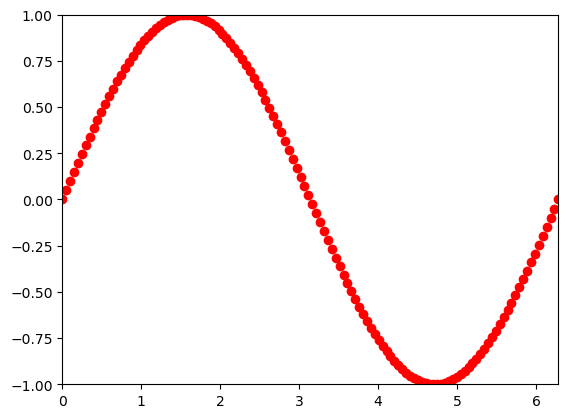

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True);
ani

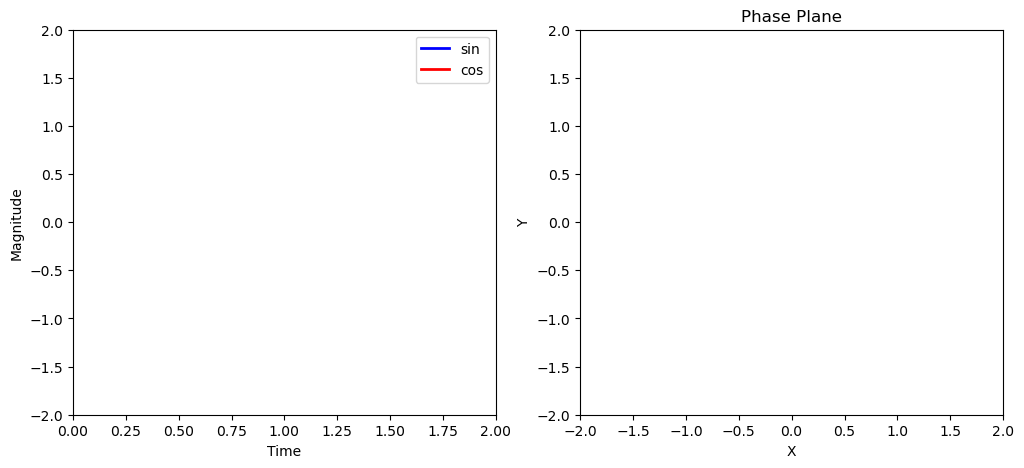

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(( 0, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Phase Plane')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin','cos']);

In [4]:


# animation function. This is called sequentially
def drawframe(n):
    x = np.linspace(0, 2, 1000)
    y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(y1[0:50],y2[0:50])
    pt1.set_data(y1[0],y2[0])
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,line2)



In [5]:


from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)



/tmp/ipykernel_67360/2138599389.py:9: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt1.set_data(y1[0],y2[0])


In [6]:
from matplotlib import rc

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [17]:


anim

